In [1]:
%matplotlib inline
import numpy as np
from scipy import io
from matplotlib import pyplot as plt
from sklearn import svm
import re
from nltk import PorterStemmer

### Support vector machine with no kernel aka linear kernel

In [2]:
data_train = io.loadmat('ex6data1.mat')

In [3]:
X = data_train['X']
y = data_train['y']

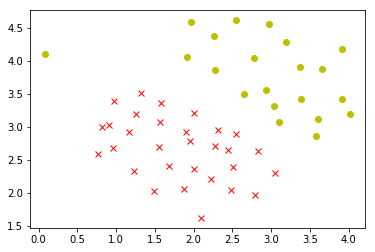

In [4]:
plt.plot(X[(y==0)[:,0], 0], X[(y==0)[:,0], 1], 'rx')
plt.plot(X[(y==1)[:,0], 0], X[(y==1)[:,0], 1], 'yo')

In [5]:
clf = svm.LinearSVC(C=0.25)
clf.fit(X,y.ravel())
clf.score(X,y.ravel())

0.98039215686274506

In [6]:
def decision_boundary(classifier, input_):
    return  (-classifier.intercept_ - np.dot(classifier.coef_[:, 0], input_))/ classifier.coef_[:, 1]

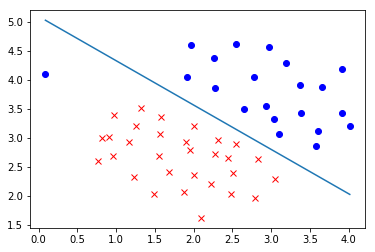

In [7]:
range_ = np.array([[np.min(X[:,0]), np.max(X[:,0])]])
plt.plot(range_.ravel(), decision_boundary(clf, range_))
plt.plot(X[(y==0)[:,0], 0], X[(y==0)[:,0], 1], 'rx')
plt.plot(X[(y==1)[:,0], 0], X[(y==1)[:,0], 1], 'bo')

### Support vector machine with gaussian kernel aka rbf in scikit-learn

In [8]:
train_data = io.loadmat('ex6data2.mat')
X, y = (train_data['X'], train_data['y'])

Visualize training data set

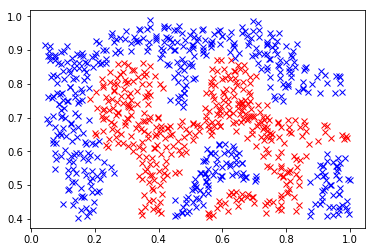

In [9]:
plt.plot(X[(y==0)[:,0], 0], X[(y==0)[:,0], 1], 'rx')
plt.plot(X[(y==1)[:,0], 0], X[(y==1)[:,0], 1], 'bx')

In [10]:
clf = svm.SVC(C=100, gamma=100)
clf.fit(X, y.ravel())
clf


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
clf.score(X,y)

0.99884125144843572

#### Visualize support vector machine non-linear classifier 

In [12]:
def visualize_boundary(X, y, model):
    """
    Plot training data and svm decision boundary that seperate training data
    
    Input: 
        X(ndarray) : training features
        y(ndarray) : training label
        model(svm.SVC) : support vector machine model
        
    Output: 
        None
    """
    
    # Plot X, y
    plt.plot(X[(y==0)[:,0], 0], X[(y==0)[:,0], 1], 'rx')
    plt.plot(X[(y==1)[:,0], 0], X[(y==1)[:,0], 1], 'bx')
    
    x1_plot = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    x2_plot = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
    
    X1, X2 = np.meshgrid(x1_plot, x2_plot)
    Z = np.zeros(X1.shape)
    
    for i in range(X1.shape[1]):
        this_X = np.append(X1[:,[i]], X2[:,[i]], axis=1)
        Z[:,i] = model.predict(this_X)
        
    plt.contour(X1, X2, Z)

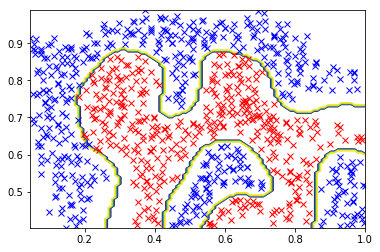

In [13]:
visualize_boundary(X, y, clf)

#### Find best support vector machine model using cross-validation technique

In [14]:
train_data = io.loadmat('ex6data3.mat')
X, y, Xval, yval = (train_data['X'], train_data['y'], train_data['Xval'], train_data['yval'])

Visualize training set

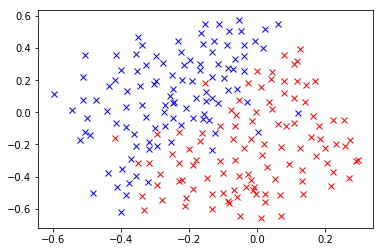

In [15]:
plt.plot(X[(y==0)[:,0], 0], X[(y==0)[:,0], 1], 'rx')
plt.plot(X[(y==1)[:,0], 0], X[(y==1)[:,0], 1], 'bx')

Plot errors of model on training set and validation set to determine the best model for our data

In [16]:
def cross_validation(X, y, Xval, yval):
    C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50, 100]
    gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50, 100]
    train_error = np.zeros((len(C_values), len(gamma_values)))
    validation_error = np.zeros((len(C_values), len(gamma_values)))
    
    clf = svm.SVC()
    for i,c in enumerate(C_values):
        for j,gamma in enumerate(gamma_values):
            clf.C = c
            clf.gamma = gamma
            clf.fit(X, y.ravel())
            train_error[i,j] = 100 - (sum(clf.predict(X) == y.ravel())/y.shape[0] * 100)
            validation_error[i,j]=100 - (sum(clf.predict(Xval) == yval.ravel())/yval.shape[0]*100)
            
    return train_error, validation_error

In [17]:
train_err, validate_err = cross_validation(X, y, Xval, yval)

In [18]:
np.around(train_err, decimals=0)

array([[ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.],
       [ 50.,  50.,  50.,  50.,  18.,  16.,  12.,  18.,  48.,  50.],
       [ 50.,  50.,  50.,  18.,  14.,  13.,  10.,   6.,   5.,   8.],
       [ 50.,  50.,  18.,  14.,  12.,  10.,   7.,   6.,   5.,   5.],
       [ 50.,  18.,  13.,  13.,   8.,   7.,   7.,   6.,   5.,   6.],
       [ 18.,  14.,  13.,   9.,   8.,   7.,   6.,   6.,   6.,   4.],
       [ 13.,  13.,   8.,   8.,   7.,   6.,   6.,   6.,   4.,   4.],
       [ 12.,   9.,   8.,   7.,   7.,   6.,   6.,   6.,   5.,   1.],
       [ 10.,   7.,   8.,   7.,   6.,   7.,   6.,   5.,   4.,   1.],
       [  9.,   8.,   8.,   6.,   7.,   6.,   6.,   4.,   2.,   0.]])

In [19]:
np.around(validate_err, decimals=0)

array([[ 56.,  56.,  56.,  56.,  56.,  56.,  56.,  56.,  56.,  56.],
       [ 56.,  56.,  56.,  56.,  20.,  17.,  10.,  31.,  55.,  56.],
       [ 56.,  56.,  54.,  18.,  16.,  10.,   8.,   5.,   6.,  14.],
       [ 56.,  56.,  18.,  14.,   9.,   7.,   4.,   4.,   4.,   4.],
       [ 50.,  18.,  14.,   9.,   6.,   5.,   5.,   4.,   4.,   4.],
       [ 18.,  14.,   8.,   6.,   8.,   4.,   4.,   4.,   4.,   6.],
       [ 14.,   8.,   7.,   6.,   8.,   5.,   5.,   5.,   6.,   6.],
       [  8.,   8.,   6.,   8.,   6.,   5.,   4.,   4.,   6.,   8.],
       [  8.,   8.,   6.,   8.,   6.,   5.,   4.,   4.,   6.,  11.],
       [  7.,   6.,   7.,   8.,   6.,   4.,   5.,   5.,   6.,  12.]])

#### Based on cross validation errors, we can see C=100 and gamma=0.03 seem like a perfect hyperparameter for our support vector machine model, because it is the smallest value of C and gamma that give the best performance to our training set and valiation set.We dont want the hyper-parameter very large because that may cause our model to overfitting the training set and validation set

In [20]:
clf = svm.SVC(C=100, gamma=0.3)
clf.fit(X,y.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

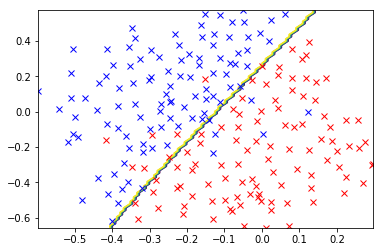

In [21]:
visualize_boundary(X, y, clf)

#### Spam email classifier using support vector machine

Email normalization : replace all number into "number" or replace all email address into "emailaddr", or all url into "httpaddr"

Read vocabulary list from file and parse it into a dictionary

In [22]:
def get_vocabulary_list(file):
    d = {}
    
    with open(file, mode='r', encoding='utf-8') as f:
        for line in f:
            (key, val) = line.split()
            d[int(key)] = val
            
    return d

In [23]:
def word_index(word, _dict):
    return list(_dict.keys())[list(_dict.values()).index(word)]

In [24]:
VOCABULARY_LIST = get_vocabulary_list('vocab.txt')

In [25]:
def preprocess_email(email_content):
    """
    Normalize email content
    Input :
        email_content(str) : content of email to preprocess
    Output:
        words_indices(ndarray) : vector contain number that represent each stem word in the content of email
    """
    
    words_indices = np.zeros((0,0), dtype=np.int16)
    stemmer = PorterStemmer()
    # lowercase email content
    email_content = email_content.lower()
    
    #Strip all HTML
    #Looks for any expression that starts with < and ends with > 
    #and does not have any < or > in the tag and replace it with a space 
    email_content = re.sub('<[^<>]+>', ' ', email_content)
    
    #Handle Numbers
    #Look for one or more characters between 0-9
    email_content = re.sub('[0-9]+', 'number', email_content)
    
    #Handle URLS
    #Look for strings starting with http:// or https://
    email_content = re.sub('(http|https)://[^\s]*', 'httpaddr', email_content)
    
    #Handle Email Addresses
    #Look for strings with @ in the middle 
    email_content = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_content)
    
    #Handle $ sign
    email_content = re.sub('[$]+', 'dollar', email_content)
    
    #========================== Tokenize Email =========================== 
    
    #Replace all punctuation with white space
    punctuations = '@$/#.-:&*+=[]?!(){},''">_<;%' + '\r' + '\n'
    for p in punctuations:
        email_content = email_content.replace(p, ' ')
         
    #Word Stemming    
    for word in email_content.split(' '):
        #Remove any non alphanumeric characters 
        word = re.sub('[^a-zA-Z0-9]', '', word)
        #Stem the word
        stem_word = stemmer.stem(word)
        #Skip the word if it is too short
        if(len(stem_word) < 1):
            continue

        try:  
            words_indices = np.append(words_indices, word_index(stem_word, VOCABULARY_LIST))
        except ValueError: # our word don't include in vocabulary text
            continue
        
    
    return words_indices

In [26]:
word_indices = None
with open('emailSample1.txt', mode='r', encoding='utf-8') as f:
    word_indices = preprocess_email(f.read())

Extract features for our spam classifier from word_indices

In [27]:
def email_features(wordIndices):
    features = np.zeros((len(VOCABULARY_LIST.keys()), 1), dtype=np.int)
    features[word_indices] = 1
    return features

In [28]:
features = email_features(word_indices)

In [29]:
train_set = io.loadmat('spamTrain.mat')
test_set = io.loadmat('spamTest.mat')

Load training and test data

In [32]:
X_train = train_set['X']
y_train = train_set['y']
X_test  = test_set['Xtest']
y_test  = test_set['ytest']

Using Support vector machine with linear kernel to classify spam emails

In [43]:
spam_clf = svm.LinearSVC()
spam_clf

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [44]:
spam_clf.fit(X_train, y_train.ravel())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
spam_clf.score(X_train, y_train.ravel())

0.99975000000000003

In [46]:
spam_clf.score(X_test, y_test.ravel())

0.97999999999999998